## Context
dataset yang digunakan adalah AWS Saas Sales, dataset ini berisi transaksi data dari sebuah SaaS company fiksi yang menjual software sales dan marketing ke company lain (Business to Business), setiap row merepresentasikan sebuah transksi dan columnya berisi :
 1. Row ID: A unique identifier for each transaction.
 2. Order ID: A unique identifier for each order.
 3. Order Date: The date when the order was placed.
 4. Date Key: A numerical representation of the order date (YYYYMMDD).
 5. Contact Name: The name of the person who placed the order.
 6. Country: The country where the order was placed.
 7. City: The city where the order was placed.
 8. Region: The region where the order was placed.
 9. Subregion: The subregion where the order was placed.
 10. Customer: The name of the company that placed the order.
 11. Customer ID: A unique identifier for each customer.
 12. Industry: The industry the customer belongs to.
 13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
 14. Product: The product was ordered.
 15. License: The license key for the product.
 16. Sales: The total sales amount for the transaction.
 17. Quantity: The total number of items in the transaction.
 18. Discount: The discount applied to the transaction.
 19. Profit: The profit from the transaction

## Problem And Audience
### Problem

#### Impact of Discounts on Sales/Profits
Kita ingin memahami dicount level (tingkat discount) mempengaruhi sales (penjualan) dan profitability (keuntungan). ini dapat membantu dalam mengoptimalkan strategy diskon untuk memaksimalkan pendapatan dan laba.  

**Urgency**   
Memahami impact dari discount pada penjualan dan keuntungan adalah hal yang crucial untuk beberapa hal :
- **Revenue Optimization**: Diskon dapat memengaruhi perilaku pembelian pelanggan secara signifikan. Menganalisis dampaknya membantu dalam menetapkan tingkat diskon optimal yang memaksimalkan pendapatan tanpa mengurangi margin keuntungan.
- **Stratey Sales :** Discounts adalah tactic sales umum. mengetahu impactnya membantu dalah mendesign discount strategies yang lebih effectives dan meningkatkan sales tanpa merugikan profitabilitas  
- **Customer Retention :** Discount dapat menarik customer baru dan mempertahankan customer yang telah ada. mengalisis dampaknya membantu dalam menyeimbangkan upaya akusisi dan retensi customer  


**Action**(aksi yang dapat dilakukan setelah melakukan analysis)  

**menyesuaikan Strategi Diskon :** mengimplementasikan optimal dicount rates dan kondisinya berdasarkan analysis untuk memaksimalkan sales dan profitability  


### initialization

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

## Data Preprocessing/Preparation

#### read data

In [79]:
df = pd.read_csv('SaaS-Sales.csv')
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

### mengubah Order Date menjadi type data datetime

In [81]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

### drop table date key karena duplicate dari order date

In [82]:
df.drop(columns='Date Key', inplace=True)

### Drop Customer ID karena memiliki fungsi yang sama dengan column Customer

In [83]:
df.drop(columns='Customer ID', inplace=True)

### Drop License Karena tidak memiliki purpose pada analysis (memiliki value yang berbeda pada setiap row)

In [84]:
df.drop(columns='License', inplace=True)

### Check for null value

In [85]:
df.isnull().any()

Row ID          False
Order ID        False
Order Date      False
Contact Name    False
Country         False
City            False
Region          False
Subregion       False
Customer        False
Industry        False
Segment         False
Product         False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

### Check untuk Jumlah Unique Value

In [86]:
df.nunique()

Row ID          9994
Order ID        5009
Order Date      1237
Contact Name     793
Country           48
City             262
Region             3
Subregion         12
Customer          99
Industry          10
Segment            3
Product           14
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Check untuk Duplicate Row

In [87]:
df[df.duplicated()]

,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit


tidak ada duplicate data

In [88]:
df.describe()

,Row ID,Order Date,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2022-05-01 00:07:12.259355648,229.858001,3.789574,0.156203,28.656896
min,1.000000,2020-01-04 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2021-05-23 00:00:00,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2022-06-27 00:00:00,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2023-05-15 00:00:00,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2023-12-31 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,623.245101,2.225110,0.206452,234.260108


karena point utama yang ingin di analysis adalah impact dari dicount pada profit maka dibuat:

In [89]:
# Supaya lebih mudah dilihat
mainpoint = ['Order ID', 'Quantity', 'Sales', 'Discount', 'Profit']
excluded_column = ['Country', 'City', 'Region', 'Subregion', 'Contact Name', 'Row ID']

## Descriptive Analysis

### Sales

#### General

In [90]:
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

Uniques Sales

In [91]:
print(f"Jumlah Uniques Sales Value : {df['Sales'].nunique()}")

Jumlah Uniques Sales Value : 5825


top 10 sales

In [92]:
df.sort_values('Sales', ascending=False)[['Order ID', 'Order Date', 'Customer', 'Product', 'Quantity', 'Sales', 'Discount', 'Profit']].head(10)

,Order ID,Order Date,Customer,Product,Quantity,Sales,Discount,Profit
2697,EMEA-2020-145317,2020-03-18,Anthem,Big Ol Database,6,22638.480,0.5,-1811.0784
6826,APJ-2022-118689,2022-10-03,Coca-Cola,Alchemy,5,17499.950,0.0,8399.9760
8153,AMER-2023-140151,2023-03-24,Mondelez International,Alchemy,4,13999.960,0.0,6719.9808
2623,EMEA-2023-127180,2023-10-23,Trafigura Group,Alchemy,4,11199.968,0.2,3919.9888
4190,APJ-2023-166709,2023-11-18,Lowes,Alchemy,3,10499.970,0.0,5039.9856
9039,AMER-2022-117121,2022-12-18,Valero Energy,ContactMatcher,13,9892.740,0.0,4946.3700
4098,EMEA-2020-116904,2020-09-23,Anthem,ContactMatcher,5,9449.950,0.0,4630.4755
4277,AMER-2022-107440,2022-04-17,Lowes,Big Ol Database,7,9099.930,0.0,2365.9818
8488,EMEA-2022-158841,2022-02-02,Honda Motor,Big Ol Database,5,8749.950,0.0,2799.9840
6425,EMEA-2022-143714,2022-05-24,BMW,Alchemy,4,8399.976,0.4,1119.9968


bottom 10 sales

In [93]:
df.sort_values('Sales', ascending=True)[['Order ID', 'Order Date', 'Customer', 'Product', 'Quantity', 'Sales', 'Discount', 'Profit']].head(10)

,Order ID,Order Date,Customer,Product,Quantity,Sales,Discount,Profit
4101,APJ-2023-102288,2023-06-20,Volkswagen,OneView,1,0.444,0.8,-1.1100
9292,APJ-2023-124114,2023-03-03,Caterpillar,ContactMatcher,1,0.556,0.8,-0.9452
8658,APJ-2022-168361,2022-06-22,Nissan Motor,ContactMatcher,1,0.836,0.8,-1.3376
4711,EMEA-2020-112403,2020-03-31,ConocoPhillips,ContactMatcher,1,0.852,0.7,-0.5964
2106,APJ-2020-152723,2020-09-26,Ford Motor,ContactMatcher,1,0.876,0.8,-1.4016
7548,APJ-2020-103492,2020-10-10,Huawei,ContactMatcher,1,0.898,0.8,-1.5715
8033,APJ-2021-119690,2021-06-25,Engie,ContactMatcher,2,0.984,0.8,-1.4760
2761,AMER-2023-126536,2023-10-13,HonHai Precision Industry,Data Smasher,1,0.990,0.0,0.4356
8024,APJ-2020-129189,2020-07-21,BNP Paribas,ContactMatcher,1,1.044,0.8,-1.8270
976,EMEA-2023-100209,2023-07-10,Tyson Foods,ContactMatcher,2,1.080,0.7,-0.7920


#### Outlier

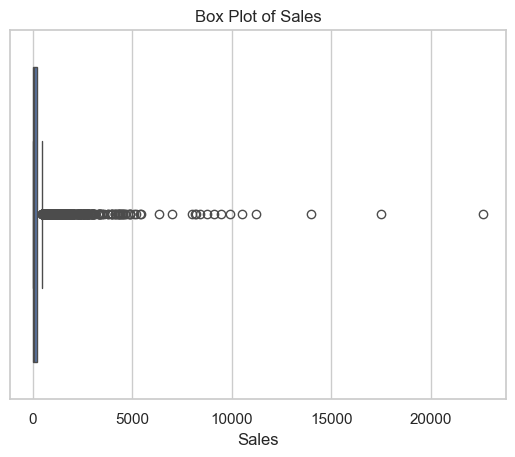

In [94]:
sns.boxplot(x=df['Sales'])
plt.title('Box Plot of Sales')
plt.show()

In [95]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
print(f"percentage outlier : {(outliers['Sales'].count() / df['Sales'].count()) * 100:.2f}%")

percentage outlier : 11.68%


### Discount

#### General

In [96]:
df['Discount'].describe()

count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

nilai uniques discount

In [97]:
print(f"Discount Unique Value : {df['Discount'].nunique()}")
df.groupby('Discount')[['Quantity','Sales','Profit']].mean(numeric_only=True)

Discount Unique Value : 12


,Quantity,Sales,Profit
Discount,,,
0.00,3.807211,226.742074,66.900292
0.10,3.968085,578.397351,96.055074
0.15,3.807692,529.971567,27.288298
0.20,3.735302,209.076940,24.702572
0.30,3.740088,454.742974,-45.679636
0.32,3.888889,536.794770,-88.560656
0.40,3.815534,565.134874,-111.927429
0.45,4.090909,498.634000,-226.646464
0.50,3.651515,892.705152,-310.703456


top 10 discount

In [98]:
df.sort_values('Discount', ascending=False)[['Order ID', 'Order Date', 'Customer', 'Product', 'Quantity', 'Sales', 'Discount', 'Profit']].head(10)

,Order ID,Order Date,Customer,Product,Quantity,Sales,Discount,Profit
679,APJ-2023-119438,2023-03-19,News Corp.,ContactMatcher,3,182.994,0.8,-320.2395
6136,APJ-2021-105613,2021-10-18,Intel,OneView,6,73.164,0.8,-186.5682
4070,APJ-2022-145303,2022-08-29,Siemens,ContactMatcher,4,10.024,0.8,-16.5396
4069,APJ-2022-145303,2022-08-29,Siemens,ContactMatcher,9,13.140,0.8,-21.6810
9292,APJ-2023-124114,2023-03-03,Caterpillar,ContactMatcher,1,0.556,0.8,-0.9452
3096,APJ-2021-114468,2021-08-23,Tyson Foods,OneView,2,5.768,0.8,-13.5548
8925,APJ-2022-168032,2022-01-30,Aviva,ContactMatcher,3,1.728,0.8,-2.6784
4028,APJ-2023-139311,2023-08-12,Pfizer,ContactMatcher,8,12.864,0.8,-22.5120
6193,APJ-2023-104927,2023-12-23,Costco Wholesale,ContactMatcher,5,6.330,0.8,-9.8115
3968,APJ-2021-163685,2021-06-01,Tyson Foods,ContactMatcher,8,5.728,0.8,-9.1648


bottom 10 discount

In [99]:
df.sort_values('Discount', ascending=True)[['Order ID', 'Order Date', 'Customer', 'Product', 'Quantity', 'Sales', 'Discount', 'Profit']].head(10)

,Order ID,Order Date,Customer,Product,Quantity,Sales,Discount,Profit
61,EMEA-2022-111682,2022-06-18,Aviva,ChatBot Plugin,1,1.68,0.0,0.8400
24,EMEA-2021-106320,2021-09-25,McKesson,ContactMatcher,3,1044.63,0.0,240.2649
26,AMER-2022-121755,2022-01-16,Siemens,Data Smasher,3,90.57,0.0,11.7741
9960,EMEA-2023-141446,2023-09-17,State Farm Insurance Cos.,Data Smasher,1,18.00,0.0,3.2400
9964,APJ-2022-146374,2022-12-06,United Parcel Service,SaaS Connector Pack,1,13.40,0.0,6.4320
9965,APJ-2022-146374,2022-12-06,United Parcel Service,Support,1,4.98,0.0,2.3406
9966,APJ-2022-146374,2022-12-06,United Parcel Service,SaaS Connector Pack - Gold,7,109.69,0.0,51.5543
9967,AMER-2023-153871,2023-12-12,AT&T,ContactMatcher,5,40.20,0.0,18.0900
4962,AMER-2020-156587,2020-03-07,Allstate,ChatBot Plugin,3,17.94,0.0,4.6644
4963,AMER-2020-156587,2020-03-07,Allstate,Marketing Suite - Gold,3,242.94,0.0,4.8588


bottom 10 discount yang bukan 0

In [100]:
df[df['Discount'] > 0].sort_values('Discount', ascending=True)[['Order ID', 'Order Date', 'Customer', 'Product', 'Quantity', 'Sales', 'Discount', 'Profit']].head(10)

,Order ID,Order Date,Customer,Product,Quantity,Sales,Discount,Profit
9721,EMEA-2022-105781,2022-02-16,BMW,FinanceHub,3,326.646,0.1,39.9234
9658,EMEA-2020-156160,2020-09-22,Morgan Stanley,FinanceHub,4,579.528,0.1,83.7096
9581,EMEA-2023-152975,2023-09-15,Walgreens,FinanceHub,5,589.410,0.1,-6.5490
9532,EMEA-2022-116596,2022-10-28,Pfizer,FinanceHub,14,427.644,0.1,80.7772
9425,EMEA-2020-116246,2020-09-12,Allianz,FinanceHub,6,3785.292,0.1,420.5880
9472,EMEA-2023-102925,2023-11-06,Anthem,FinanceHub,2,128.124,0.1,24.2012
9314,AMER-2021-111948,2021-11-11,China National Petroleum,OneView,2,123.858,0.1,46.7908
9394,EMEA-2020-125997,2020-09-20,Carrefour,FinanceHub,2,631.782,0.1,140.3960
9150,AMER-2020-157070,2020-06-01,Samsung Electronics,OneView,5,65.520,0.1,12.3760
9267,EMEA-2021-151869,2021-09-25,Boeing,FinanceHub,1,102.582,0.1,6.8388


#### Outlier

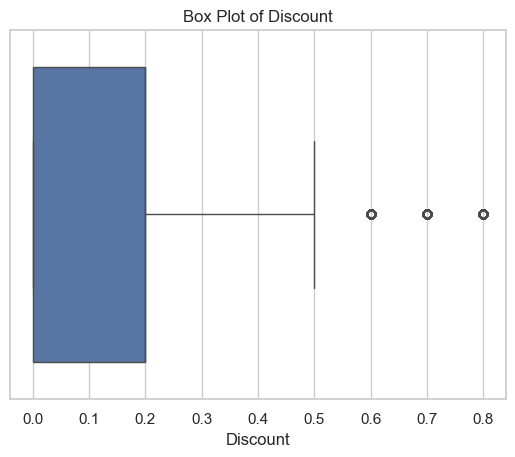

In [101]:
sns.boxplot(x=df['Discount'])
plt.title('Box Plot of Discount')
plt.show()

In [102]:
Q1 = df['Discount'].quantile(0.25)
Q3 = df['Discount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Discount'] < lower_bound) | (df['Discount'] > upper_bound)]
print(f"percentage outlier : {(outliers['Discount'].count() / df['Discount'].count()) * 100:.2f}%")

percentage outlier : 8.57%


### Profit

#### General

In [103]:
df['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

top 10 profit

In [104]:
df.sort_values('Profit', ascending=False)[['Order ID', 'Order Date', 'Customer', 'Product', 'Quantity', 'Sales', 'Discount', 'Profit']].head(10)

,Order ID,Order Date,Customer,Product,Quantity,Sales,Discount,Profit
6826,APJ-2022-118689,2022-10-03,Coca-Cola,Alchemy,5,17499.950,0.0,8399.9760
8153,AMER-2023-140151,2023-03-24,Mondelez International,Alchemy,4,13999.960,0.0,6719.9808
4190,APJ-2023-166709,2023-11-18,Lowes,Alchemy,3,10499.970,0.0,5039.9856
9039,AMER-2022-117121,2022-12-18,Valero Energy,ContactMatcher,13,9892.740,0.0,4946.3700
4098,EMEA-2020-116904,2020-09-23,Anthem,ContactMatcher,5,9449.950,0.0,4630.4755
2623,EMEA-2023-127180,2023-10-23,Trafigura Group,Alchemy,4,11199.968,0.2,3919.9888
509,EMEA-2021-145352,2021-03-16,Lukoil,ContactMatcher,5,6354.950,0.0,3177.4750
8488,EMEA-2022-158841,2022-02-02,Honda Motor,Big Ol Database,5,8749.950,0.0,2799.9840
7666,EMEA-2022-140158,2022-10-05,Glencore,Alchemy,9,5399.910,0.0,2591.9568
6520,AMER-2023-138289,2023-01-17,Alphabet,ContactMatcher,4,5443.960,0.0,2504.2216


bottom 10 profit

In [105]:
df.sort_values('Profit', ascending=True)[['Order ID', 'Order Date', 'Customer', 'Product', 'Quantity', 'Sales', 'Discount', 'Profit']].head(10)

,Order ID,Order Date,Customer,Product,Quantity,Sales,Discount,Profit
7772,AMER-2022-108196,2022-11-26,Allstate,Big Ol Database,5,4499.985,0.7,-6599.9780
683,EMEA-2023-168116,2023-11-05,Costco Wholesale,Big Ol Database,4,7999.980,0.5,-3839.9904
9774,APJ-2020-169019,2020-07-26,Bosch,ContactMatcher,8,2177.584,0.8,-3701.8928
3011,EMEA-2023-134845,2023-04-18,FedEx,Big Ol Database,5,2549.985,0.7,-3399.9800
4991,APJ-2023-122714,2023-12-08,Ford Motor,ContactMatcher,5,1889.990,0.8,-2929.4845
3151,AMER-2021-147830,2021-12-15,Walgreens,Big Ol Database,2,1799.994,0.7,-2639.9912
5310,APJ-2023-131254,2023-11-20,Itochu,ContactMatcher,6,1525.188,0.8,-2287.7820
9639,EMEA-2021-116638,2021-01-28,Morgan Stanley,ContactMatcher,13,4297.644,0.4,-1862.3124
1199,APJ-2022-130946,2022-04-09,Volkswagen,ContactMatcher,4,1088.792,0.8,-1850.9464
2697,EMEA-2020-145317,2020-03-18,Anthem,Big Ol Database,6,22638.480,0.5,-1811.0784


#### Outlier

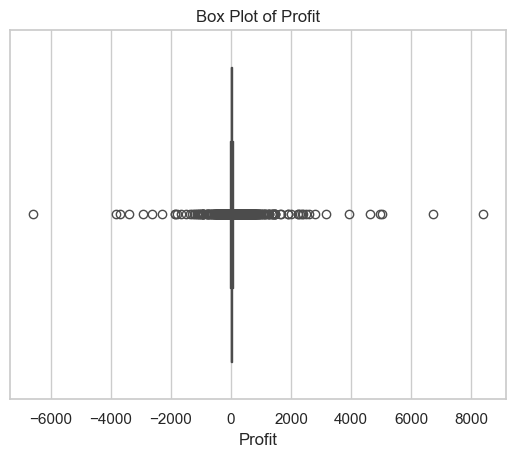

In [106]:
sns.boxplot(x=df['Profit'])
plt.title('Box Plot of Profit')
plt.show()

In [107]:
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Profit'] < lower_bound) | (df['Profit'] > upper_bound)]
print(f"percentage outlier : {(outliers['Profit'].count() / df['Profit'].count()) * 100:.2f}%")

percentage outlier : 18.82%


### Categorize Discount

Assumsi :
karena, hasil general analysis dari discount adalah :   
count    9994.000000  
mean        0.156203  
std         0.206452  
min         0.000000  
25%         0.000000  
50%         0.200000  
75%         0.200000  
max         0.800000  

maka kita dapat membuat 2 category yaitu <= 20% (average/median), dan >20% (Tinggi)

In [108]:
df['Discount Category'] = df['Discount'].apply(lambda x: 'Average' if x <= 0.20 else 'High')
df.head().drop(columns=excluded_column)

,Order ID,Order Date,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Discount Category
0,EMEA-2022-152156,2022-11-09,Chevron,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136,Average
1,EMEA-2022-152156,2022-11-09,Chevron,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820,Average
2,AMER-2022-138688,2022-06-13,Phillips 66,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714,Average
3,EMEA-2021-108966,2021-10-11,Royal Dutch Shell,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310,High
4,EMEA-2021-108966,2021-10-11,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164,Average


In [109]:
summary_stats = df.groupby('Discount Category').agg({'Quantity': ['mean', 'median', 'std'], 'Sales': ['mean', 'median', 'std'], 'Profit': ['mean', 'median', 'std']})
summary_stats

Quantity                        Sales                      \
                       mean median       std        mean  median         std   
Discount Category                                                              
Average            3.778398    3.0  2.227879  224.907651  55.328  584.422829   
High               3.858579    3.0  2.207475  260.423654  44.400  822.974240   

                      Profit                       
                        mean   median         std  
Discount Category                                  
Average            49.037679  11.5432  208.377669  
High              -97.183098 -18.2525  327.542304

## Visualization

overall correlation

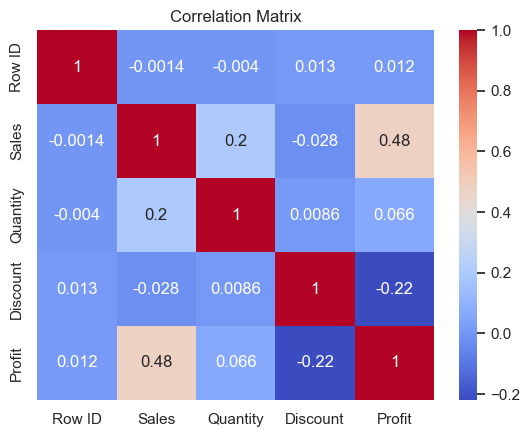

In [110]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Sales - Profit (0.48) : adanya korelasi positive lemah antara sales dan profit dimana jika sales naik maka profit juga naik. tetapi 0.48 berarti korelasi tidak terlalu kuat

Profit - Discount (-0.22) : adanya korelasi negative lemah antara dimana jika discount naik maka profit akan menurun. tetapi -0.22 berarti korelasi tidak terlalu kuat

Discount - Sales (-0.028) : adanya korelasi negative yang sangan lemah, valuenya hampir nol, berarti hampir tidak ada linear relationship antar sales dan discount. ini berarti discount tidak memiliki effect yang signinifikan terhadap sales

### Sales

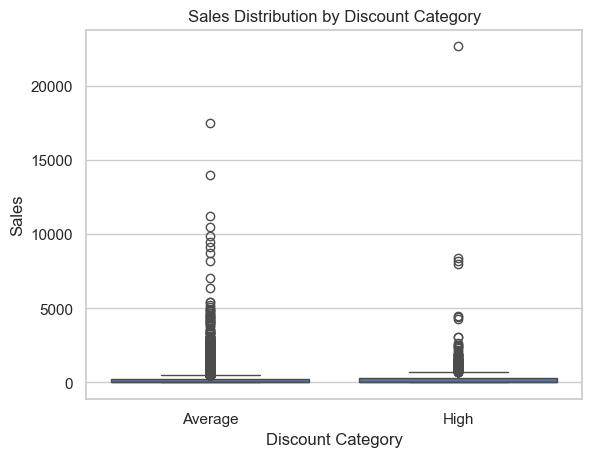

In [111]:
sns.boxplot(x='Discount Category', y='Sales', data=df)
plt.title('Sales Distribution by Discount Category')
plt.show()

#### Discount

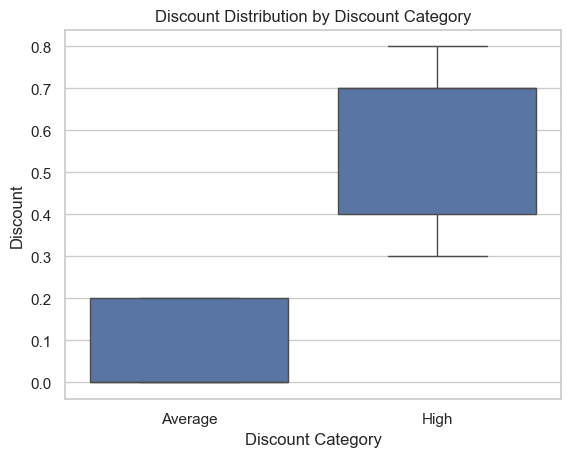

In [112]:
sns.boxplot(x='Discount Category', y='Discount', data=df)
plt.title('Discount Distribution by Discount Category')
plt.show()

#### Profit

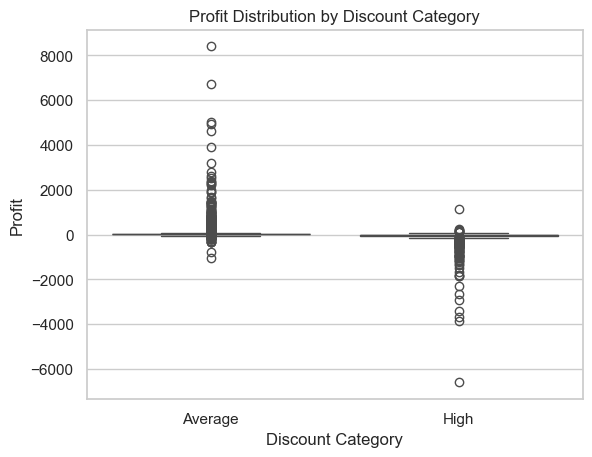

In [113]:
sns.boxplot(x='Discount Category', y='Profit', data=df)
plt.title('Profit Distribution by Discount Category')
plt.show()

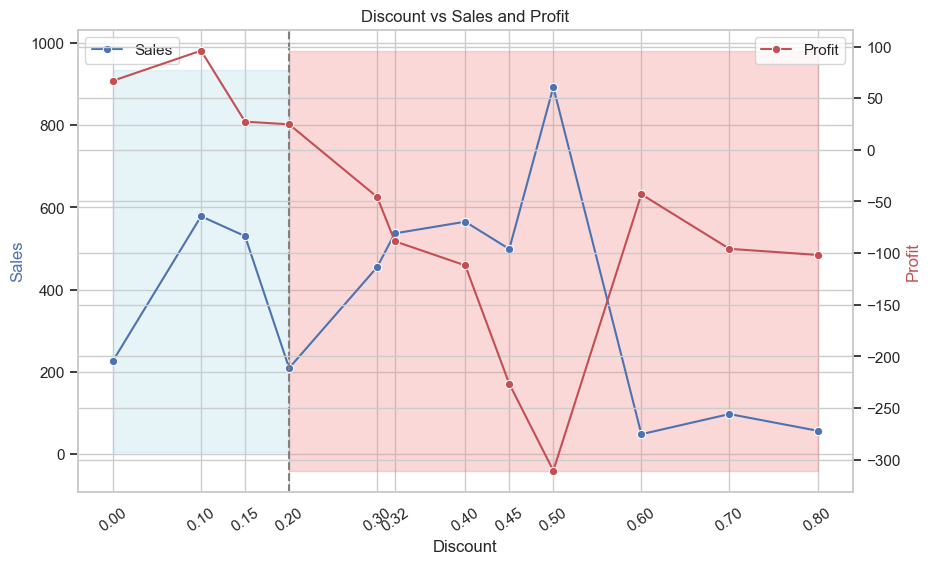

In [114]:
# Set the style of the plots
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Discount vs Sales
sns.lineplot(x='Discount', y='Sales', data=df, marker='o', ax=ax1, label='Sales', color='b', errorbar=None)

# Create a second y-axis for Profit
ax2 = ax1.twinx()
sns.lineplot(x='Discount', y='Profit', data=df, marker='o', ax=ax2, label='Profit', color='r', errorbar=None)

# divider Cateogry
ax1.axvline(x=0.2, color='gray', linestyle='--')
ax1.fill_betweenx(ax1.get_ylim(), 0, 0.2, color='lightblue', alpha=0.3)
ax1.fill_betweenx(ax1.get_ylim(), 0.2, df['Discount'].max(), color='lightcoral', alpha=0.3)

# anotation
ax1.set_xticks(df['Discount'].unique())
ax1.set_xticklabels([f'{discount:.2f}' for discount in df['Discount'].unique()], rotation=35)

# Set axis labels
ax1.set_xlabel('Discount')
ax1.set_ylabel('Sales', color='b')
ax2.set_ylabel('Profit', color='r')

# Set the title
plt.title('Discount vs Sales and Profit')

# Show the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

## Inferential Analysis

Hypothesis :
Berdasarkan graph yang telah dibuat hypthesisnya adalah **"Average Discount memiliki average Sales dan Profit yang lebih besar daripada high Discount"**

In [115]:
average_discount_sales = df[df['Discount Category'] == 'Average']['Sales']
high_discount_sales = df[df['Discount Category'] == 'High']['Sales'] 

average_discount_profit = df[df['Discount Category'] == 'Average']['Profit']
high_discount_profit = df[df['Discount Category'] == 'High']['Profit'] 

# Mann-Whitney U test for Sales
stat, p = stats.mannwhitneyu(average_discount_sales, high_discount_sales)
print(f'Mann-Whitney U Test for Sales: Statistics={stat}, p-value={p}')

# Mann-Whitney U test for Profit
stat, p = stats.mannwhitneyu(average_discount_profit, high_discount_profit)
print(f'Mann-Whitney U Test for Profit: Statistics={stat}, p-value={p}')

Mann-Whitney U Test for Sales: Statistics=6497603.0, p-value=3.8686862022239474e-07
Mann-Whitney U Test for Profit: Statistics=11481791.5, p-value=0.0


**Sales**  
karena ada p-value yang significant, maka dapat disimpulan secara statistic ada perbedaan sales yang significant antara 'average' dan 'high' discount.  
**Profit**  
Karena p-value yang sangat significant, ini menandakan perbedaan yang sangat besar pada profit antara 'average' dan 'high' discount categories. Average Discount(<=20%) memiliki profit yang jauh lebih tinggi daripada High Discount  

## Suplementary

#### Discount, Sales, and Profit by Industry

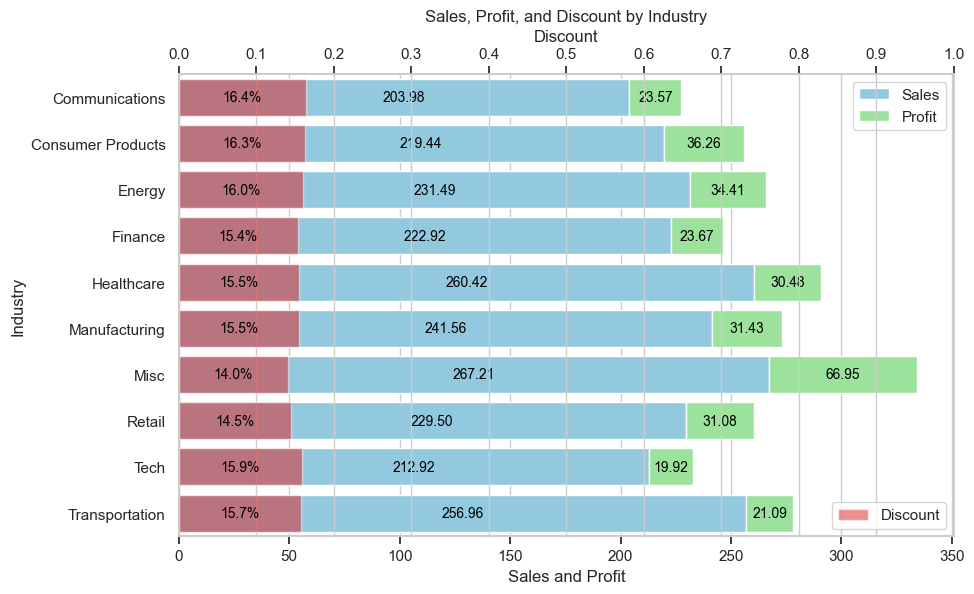

In [116]:
grouped_df = df.groupby('Industry')[['Discount', 'Sales', 'Profit']].mean().reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Sales and Profit
bar_width = 0.4
indices = range(len(grouped_df))

# Sales bars
sns.barplot(data=grouped_df, y='Industry', x='Sales', ax=ax1, color='skyblue', label='Sales', orient='h', errorbar=None)

# Profit bars
sns.barplot(data=grouped_df, y='Industry', x='Profit', ax=ax1, color='lightgreen', label='Profit', orient='h', errorbar=None, left=grouped_df['Sales'])

# Secondary axis for Discount
ax2 = ax1.twiny()

# Adjust the position of the Discount bars
ax2.set_xlim(ax1.get_xlim())
sns.barplot(data=grouped_df, y='Industry', x='Discount', ax=ax2, color='red', label='Discount', orient='h', errorbar=None, alpha=0.5)

# Annotations for Sales and Profit
for i in range(len(grouped_df)):
    ax1.text(grouped_df['Sales'][i] / 2, i, f"{grouped_df['Sales'][i]:.2f}", ha='center', va='center', color='black', fontsize=10)
    ax1.text(grouped_df['Sales'][i] + grouped_df['Profit'][i] / 2, i, f"{grouped_df['Profit'][i]:.2f}", ha='center', va='center', color='black', fontsize=10)

# Annotations for Discount
for i in range(len(grouped_df)):
    ax2.text(grouped_df['Discount'][i] / 2, i, f"{grouped_df['Discount'][i] * 100:.1f}%", ha='center', va='center', color='black', fontsize=10)

# Labels and Titles
ax1.set_ylabel('Industry')
ax1.set_xlabel('Sales and Profit')
ax2.set_xlabel('Discount')
ax1.set_title('Sales, Profit, and Discount by Industry')

# Set y-ticks to industry names
ax1.set_yticks(range(len(grouped_df)))
ax1.set_yticklabels(grouped_df['Industry'])

# Adjust the x-axis limits for ax2
ax2.set_xlim(0, 1)
ax2.set_xticks([i * 0.1 for i in range(11)])
# Legends
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

plt.show()

#### Discount, Sales, and Profit by Segment

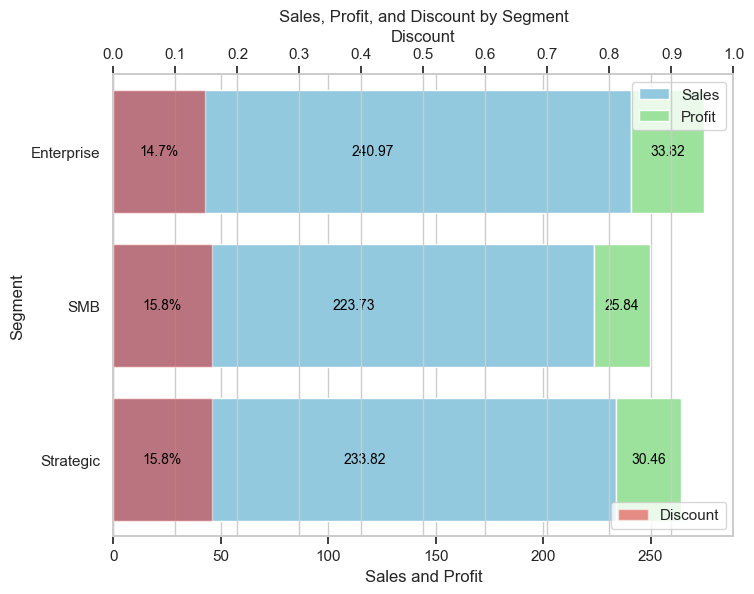

In [117]:
grouped_df = df.groupby('Segment')[['Discount', 'Sales', 'Profit']].mean().reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 6))

# Bar plot for Sales and Profit
bar_width = 0.4
indices = range(len(grouped_df))

# Sales bars
sns.barplot(data=grouped_df, y='Segment', x='Sales', ax=ax1, color='skyblue', label='Sales', orient='h', errorbar=None)

# Profit bars
sns.barplot(data=grouped_df, y='Segment', x='Profit', ax=ax1, color='lightgreen', label='Profit', orient='h', errorbar=None, left=grouped_df['Sales'])

# Secondary axis for Discount
ax2 = ax1.twiny()

# Adjust the position of the Discount bars
ax2.set_xlim(ax1.get_xlim())
sns.barplot(data=grouped_df, y='Segment', x='Discount', ax=ax2, color='red', label='Discount', orient='h', errorbar=None, alpha=0.5)

# Annotations for Sales and Profit
for i in range(len(grouped_df)):
    ax1.text(grouped_df['Sales'][i] / 2, i, f"{grouped_df['Sales'][i]:.2f}", ha='center', va='center', color='black', fontsize=10)
    ax1.text(grouped_df['Sales'][i] + grouped_df['Profit'][i] / 2, i, f"{grouped_df['Profit'][i]:.2f}", ha='center', va='center', color='black', fontsize=10)

# Annotations for Discount
for i in range(len(grouped_df)):
    ax2.text(grouped_df['Discount'][i] / 2, i, f"{grouped_df['Discount'][i] * 100:.1f}%", ha='center', va='center', color='black', fontsize=10)

# Labels and Titles
ax1.set_ylabel('Segment')
ax1.set_xlabel('Sales and Profit')
ax2.set_xlabel('Discount')
ax1.set_title('Sales, Profit, and Discount by Segment')

# Set y-ticks to industry names
ax1.set_yticks(range(len(grouped_df)))
ax1.set_yticklabels(grouped_df['Segment'])

# Adjust the x-axis limits for ax2
ax2.set_xlim(0, 1)
ax2.set_xticks([i * 0.1 for i in range(11)])
# Legends
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

plt.show()

#### Discount, Sales, and Profit by Customer

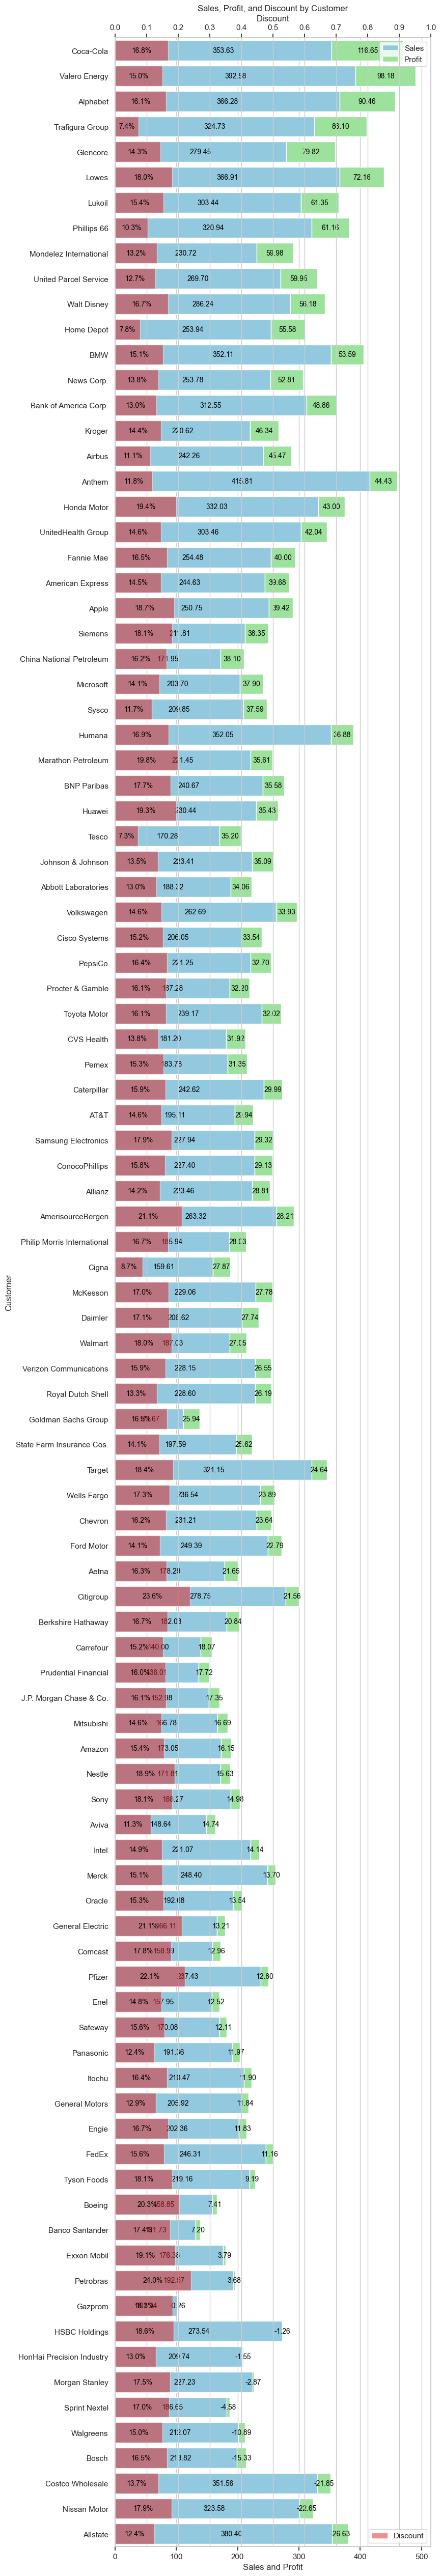

In [118]:
grouped_df = df.groupby('Customer')[['Discount', 'Sales', 'Profit']].mean().reset_index()

# Sort by Profit in descending order
grouped_df = grouped_df.sort_values(by='Profit', ascending=False).reset_index(drop=True)

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 64))

# Bar plot for Sales and Profit
bar_width = 0.4
indices = range(len(grouped_df))

# Sales bars
sns.barplot(data=grouped_df, y='Customer', x='Sales', ax=ax1, color='skyblue', label='Sales', orient='h', errorbar=None)

# Profit bars
sns.barplot(data=grouped_df, y='Customer', x='Profit', ax=ax1, color='lightgreen', label='Profit', orient='h', errorbar=None, left=grouped_df['Sales'])

# Secondary axis for Discount
ax2 = ax1.twiny()

# Adjust the position of the Discount bars
ax2.set_xlim(ax1.get_xlim())
sns.barplot(data=grouped_df, y='Customer', x='Discount', ax=ax2, color='red', label='Discount', orient='h', errorbar=None, alpha=0.5)

# Annotations for Sales and Profit
for i in range(len(grouped_df)):
    ax1.text(grouped_df['Sales'][i] / 2, i, f"{grouped_df['Sales'][i]:.2f}", ha='center', va='center', color='black', fontsize=10)
    ax1.text(grouped_df['Sales'][i] + grouped_df['Profit'][i] / 2, i, f"{grouped_df['Profit'][i]:.2f}", ha='center', va='center', color='black', fontsize=10)

# Annotations for Discount
for i in range(len(grouped_df)):
    ax2.text(grouped_df['Discount'][i] / 2, i, f"{grouped_df['Discount'][i] * 100:.1f}%", ha='center', va='center', color='black', fontsize=10)

# Labels and Titles
ax1.set_ylabel('Customer')
ax1.set_xlabel('Sales and Profit')
ax2.set_xlabel('Discount')
ax1.set_title('Sales, Profit, and Discount by Customer')

# Set y-ticks to customer names
ax1.set_yticks(range(len(grouped_df)))
ax1.set_yticklabels(grouped_df['Customer'])

# Adjust the x-axis limits for ax2
ax2.set_xlim(0, 1)
ax2.set_xticks([i * 0.1 for i in range(11)])

# Legends
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

plt.show()

#### Discount, Sales, and Profit by Country

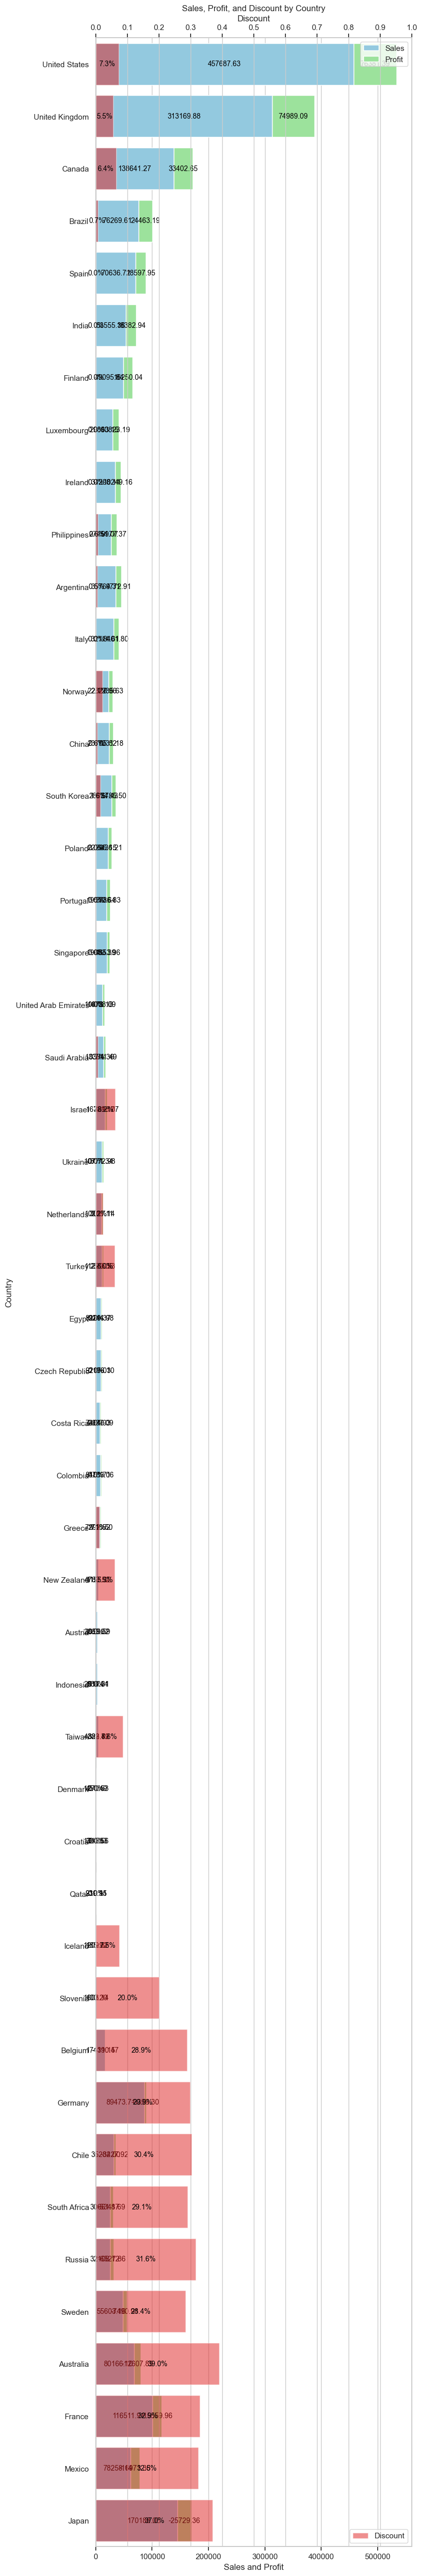

In [119]:
grouped_df = df.groupby('Country').agg({
    'Discount': 'mean',
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Sort by Profit in descending order
grouped_df = grouped_df.sort_values(by='Profit', ascending=False).reset_index(drop=True)

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 64))

# Bar plot for Sales and Profit
bar_width = 0.4
indices = range(len(grouped_df))

# Sales bars
sns.barplot(data=grouped_df, y='Country', x='Sales', ax=ax1, color='skyblue', label='Sales', orient='h', errorbar=None)

# Profit bars
sns.barplot(data=grouped_df, y='Country', x='Profit', ax=ax1, color='lightgreen', label='Profit', orient='h', errorbar=None, left=grouped_df['Sales'])

# Secondary axis for Discount
ax2 = ax1.twiny()

# Adjust the position of the Discount bars
ax2.set_xlim(ax1.get_xlim())
sns.barplot(data=grouped_df, y='Country', x='Discount', ax=ax2, color='red', label='Discount', orient='h', errorbar=None, alpha=0.5)

# Annotations for Sales and Profit
for i in range(len(grouped_df)):
    ax1.text(grouped_df['Sales'][i] / 2, i, f"{grouped_df['Sales'][i]:.2f}", ha='center', va='center', color='black', fontsize=10)
    ax1.text(grouped_df['Sales'][i] + grouped_df['Profit'][i] / 2, i, f"{grouped_df['Profit'][i]:.2f}", ha='center', va='center', color='black', fontsize=10)

# Annotations for Discount
for i in range(len(grouped_df)):
    ax2.text(grouped_df['Discount'][i] / 2, i, f"{grouped_df['Discount'][i] * 100:.1f}%", ha='center', va='center', color='black', fontsize=10)

# Labels and Titles
ax1.set_ylabel('Country')
ax1.set_xlabel('Sales and Profit')
ax2.set_xlabel('Discount')
ax1.set_title('Sales, Profit, and Discount by Country')

# Set y-ticks to customer names
ax1.set_yticks(range(len(grouped_df)))
ax1.set_yticklabels(grouped_df['Country'])

# Adjust the x-axis limits for ax2
ax2.set_xlim(0, 1)
ax2.set_xticks([i * 0.1 for i in range(11)])

# Legends
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

plt.show()

In [120]:
grouped_df

,Country,Discount,Sales,Profit
0,United States,0.072764,457687.6315,76381.3871
1,United Kingdom,0.054689,313169.8810,74989.0891
2,Canada,0.064032,138641.2700,33402.6517
3,Brazil,0.007059,76269.6140,24463.1876
4,Spain,0.000000,70636.7200,18597.9504
5,India,0.000000,53555.3600,18382.9363
6,Finland,0.000000,49095.8400,16250.0433
7,Luxembourg,0.000000,29863.1500,10823.1874
8,Ireland,0.000000,34298.1400,10249.1561
9,Philippines,0.006250,27451.0690,9977.3748


#### Transaction Count, Discount, Sales, and Profit by Country

In [121]:
temp = df.copy()
temp['Discount Status'] = df['Discount'].apply(lambda x : 1 if x > 0 else 0)

temp = temp.groupby('Country').agg({
    'Order ID': 'count',
    'Quantity': ['sum', 'mean'],
    'Discount Status': 'sum',
    'Discount': 'mean',
    'Sales': 'sum',
    'Profit': 'sum'
}).rename(columns={'Order ID': 'Transaction'})

# Flatten the multi-level columns
temp.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in temp.columns.values]

# Sort by Profit
temp = temp.sort_values('Profit_sum', ascending=False).rename(columns={'Discount Status_sum': 'Discount Count'})

temp

,Transaction_count,Quantity_sum,Quantity_mean,Discount Count,Discount_mean,Sales_sum,Profit_sum
Country,,,,,,,
United States,2001,7667,3.831584,741,0.072764,457687.6315,76381.3871
United Kingdom,1141,4268,3.740578,322,0.054689,313169.8810,74989.0891
Canada,506,1883,3.721344,162,0.064032,138641.2700,33402.6517
Brazil,255,946,3.709804,18,0.007059,76269.6140,24463.1876
Spain,224,893,3.986607,0,0.000000,70636.7200,18597.9504
India,149,578,3.879195,0,0.000000,53555.3600,18382.9363
Finland,184,705,3.831522,0,0.000000,49095.8400,16250.0433
Luxembourg,89,331,3.719101,0,0.000000,29863.1500,10823.1874
Ireland,126,479,3.801587,0,0.000000,34298.1400,10249.1561


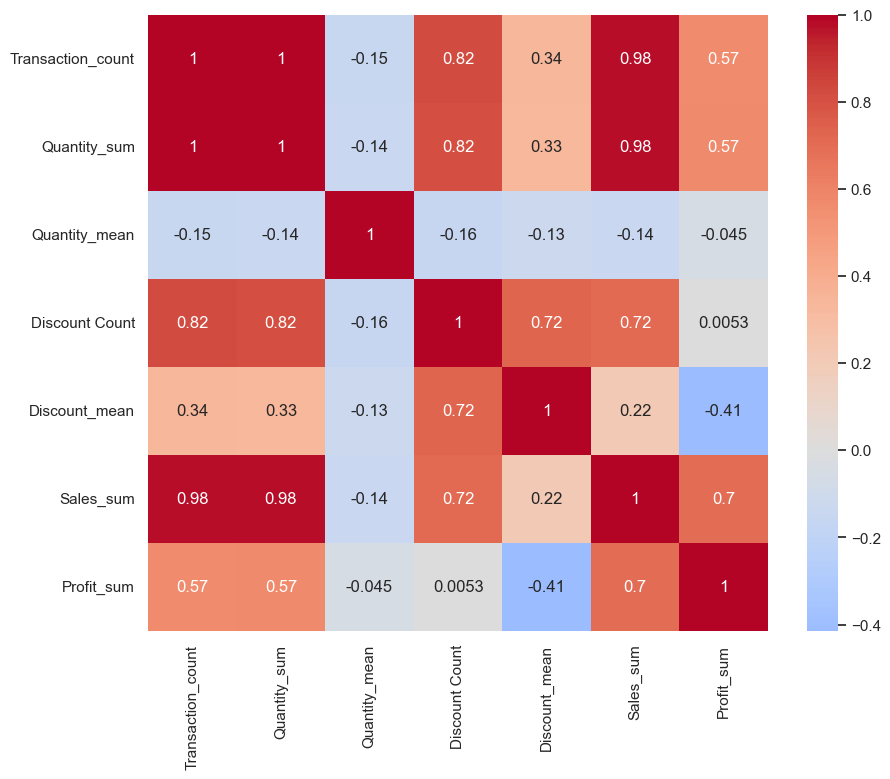

In [122]:
corr_matrix = temp.corr()

plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

Quantity_mean : tidak memiliki korelasi yang kuat terhadap apapun.   

Transaction_count - Quantity_sum (1) : perfect positive relation dima jika transaction count naik maka total quantity pasti juga akan naik, yang manaa masuk akal.  

Transaction_count/Quantity_sum - Sales_sum (0.98) : very strong positive relation antara Transaction_count/Quantity_sum and Sales_sum diamana jika, Transaction count/Quantity naik makan Sales akan naik secara significan yang mana masuk akal.  

Profit_sum - Sales_sum (0.7) : korelasi 0.7 berarti strong positive relation, dimana jika sales naik, maka secara general diasosiasikan dengan profits yang lebih tinggi. tetapi relationnya tidak perfect. jadi ada factor lain yang bisa mempengaruhi profit.  

Transaction_count/Quantity_sum - Discount Count (0.82) : korelasi 0.82 berarti strong positive relation, dimana jika jumlah transaksi/total quantity naik maka biasanya jumlah discount total juga akan naik. ini bisa berarti bahwa discounts diberikan untuk mendorong penjulan / quantitasnya.   

Transaction_count/Quantity_sum - Discount_mean (0.34) :  korelasi 0.34 menandakan weak positive relation antara jumlah transaksi / total quantity. dimana ada tendency dimana jika jumlah transaksi / total quantity naik maka discount juga akan nai sedikit. tapi ada factor lain yang lebih prominent yang mempengaruhi nilai discount itu sendiri.  

Discount Count - Discount_mean (0.72) : korelasi 0.72 berarti strong positive relationi, dimana semakin banyak discount (jumlah) yang diberikan maka discount value (nilai discountnya) juga memiliki kemungkinan besar naik. ini mengimplikasikan bahwa lebih banyak discount yang diberikan maka biasanya discount valuenya lebih besar atau strategi pemberian diskon yang elbih sering melibatkan diskon yang lebih besar.





#### Discount, Sales, and Profit by Region

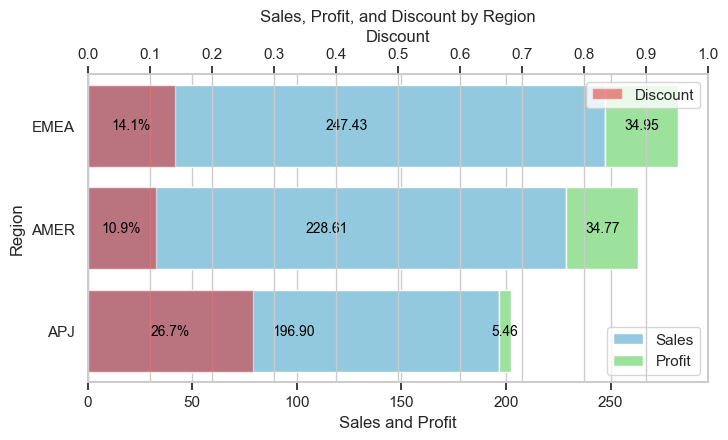

In [123]:
grouped_df = df.groupby('Region')[['Discount', 'Sales', 'Profit']].mean().reset_index()

# Sort by Profit in descending order
grouped_df = grouped_df.sort_values(by='Profit', ascending=False).reset_index(drop=True)

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 4))

# Bar plot for Sales and Profit
bar_width = 0.4
indices = range(len(grouped_df))

# Sales bars
sns.barplot(data=grouped_df, y='Region', x='Sales', ax=ax1, color='skyblue', label='Sales', orient='h', errorbar=None)

# Profit bars
sns.barplot(data=grouped_df, y='Region', x='Profit', ax=ax1, color='lightgreen', label='Profit', orient='h', errorbar=None, left=grouped_df['Sales'])

# Secondary axis for Discount
ax2 = ax1.twiny()

# Adjust the position of the Discount bars
ax2.set_xlim(ax1.get_xlim())
sns.barplot(data=grouped_df, y='Region', x='Discount', ax=ax2, color='red', label='Discount', orient='h', errorbar=None, alpha=0.5)

# Annotations for Sales and Profit
for i in range(len(grouped_df)):
    ax1.text(grouped_df['Sales'][i] / 2, i, f"{grouped_df['Sales'][i]:.2f}", ha='center', va='center', color='black', fontsize=10)
    ax1.text(grouped_df['Sales'][i] + grouped_df['Profit'][i] / 2, i, f"{grouped_df['Profit'][i]:.2f}", ha='center', va='center', color='black', fontsize=10)

# Annotations for Discount
for i in range(len(grouped_df)):
    ax2.text(grouped_df['Discount'][i] / 2, i, f"{grouped_df['Discount'][i] * 100:.1f}%", ha='center', va='center', color='black', fontsize=10)

# Labels and Titles
ax1.set_ylabel('Region')
ax1.set_xlabel('Sales and Profit')
ax2.set_xlabel('Discount')
ax1.set_title('Sales, Profit, and Discount by Region')

# Set y-ticks to customer names
ax1.set_yticks(range(len(grouped_df)))
ax1.set_yticklabels(grouped_df['Region'])

# Adjust the x-axis limits for ax2
ax2.set_xlim(0, 1)
ax2.set_xticks([i * 0.1 for i in range(11)])

# Legends
ax1.legend(loc='lower right')
ax2.legend(loc='upper right')

plt.show()

#### Discount, Sales, and Profit by subRegion

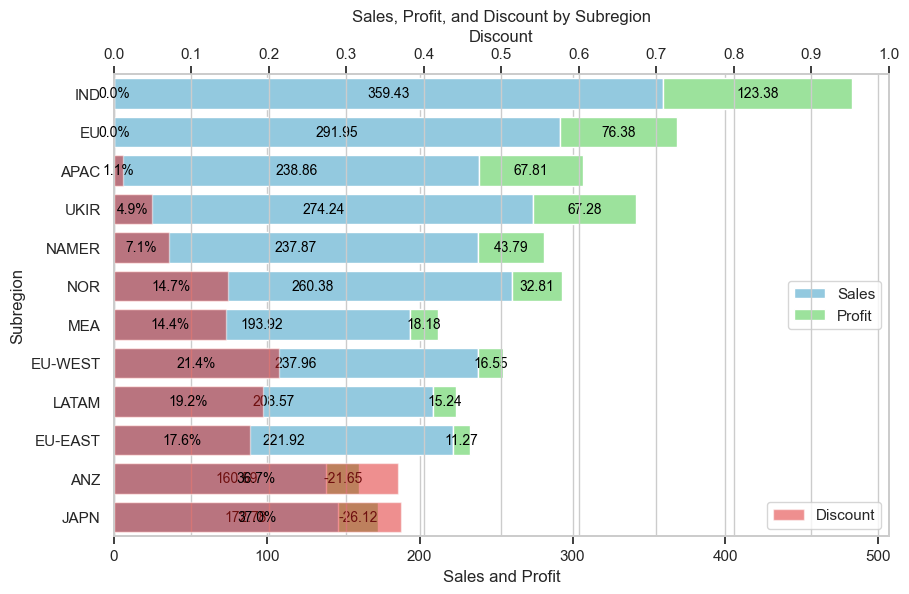

In [124]:
grouped_df = df.groupby('Subregion')[['Discount', 'Sales', 'Profit']].mean().reset_index()

# Sort by Profit in descending order
grouped_df = grouped_df.sort_values(by='Profit', ascending=False).reset_index(drop=True)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Sales and Profit
bar_width = 0.4
indices = range(len(grouped_df))

# Sales bars
sns.barplot(data=grouped_df, y='Subregion', x='Sales', ax=ax1, color='skyblue', label='Sales', orient='h', errorbar=None)

# Profit bars
sns.barplot(data=grouped_df, y='Subregion', x='Profit', ax=ax1, color='lightgreen', label='Profit', orient='h', errorbar=None, left=grouped_df['Sales'])

# Secondary axis for Discount
ax2 = ax1.twiny()

# Adjust the position of the Discount bars
ax2.set_xlim(ax1.get_xlim())
sns.barplot(data=grouped_df, y='Subregion', x='Discount', ax=ax2, color='red', label='Discount', orient='h', errorbar=None, alpha=0.5)

# Annotations for Sales and Profit
for i in range(len(grouped_df)):
    ax1.text(grouped_df['Sales'][i] / 2, i, f"{grouped_df['Sales'][i]:.2f}", ha='center', va='center', color='black', fontsize=10)
    ax1.text(grouped_df['Sales'][i] + grouped_df['Profit'][i] / 2, i, f"{grouped_df['Profit'][i]:.2f}", ha='center', va='center', color='black', fontsize=10)

# Annotations for Discount
for i in range(len(grouped_df)):
    ax2.text(grouped_df['Discount'][i] / 2, i, f"{grouped_df['Discount'][i] * 100:.1f}%", ha='center', va='center', color='black', fontsize=10)

# Labels and Titles
ax1.set_ylabel('Subregion')
ax1.set_xlabel('Sales and Profit')
ax2.set_xlabel('Discount')
ax1.set_title('Sales, Profit, and Discount by Subregion')

# Set y-ticks to customer names
ax1.set_yticks(range(len(grouped_df)))
ax1.set_yticklabels(grouped_df['Subregion'])

# Adjust the x-axis limits for ax2
ax2.set_xlim(0, 1)
ax2.set_xticks([i * 0.1 for i in range(11)])

# Legends
ax1.legend(loc='center right')
ax2.legend(loc='lower right')

plt.show()

In [125]:
grouped_df

,Subregion,Discount,Sales,Profit
0,IND,0.000000,359.431946,123.375411
1,EU,0.000000,291.951000,76.380004
2,APAC,0.011409,238.861772,67.810241
3,UKIR,0.049250,274.244689,67.275647
4,NAMER,0.071001,237.865537,43.791001
5,NOR,0.146830,260.382331,32.811371
6,MEA,0.144192,193.923475,18.182189
7,EU-WEST,0.213662,237.958869,16.546842
8,LATAM,0.192401,208.567101,15.235709
9,EU-EAST,0.175802,221.918700,11.266733
